In [414]:
## Utility
import os
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt

In [415]:
## Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

##Models
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [416]:
## Change directory
path = r"C:\Users\sbsro\Documents\ML_Projects\MLB Pitching"
os.chdir(path)

In [417]:
## Load Data
df = pd.read_csv('kbopitchingdata.csv')

In [418]:
## Pandas Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [419]:
df.head()

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,games,games_started,games_finished,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,intentional_walks,strikeouts,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,143,143.0,143.0,0,18,32,1264.1,1117,557,501,79,542,17.0,1062,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,143,143.0,141.0,2,6,33,1255.0,1166,581,512,85,486,18.0,1051,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,143,143.0,141.0,2,10,27,1260.1,1288,653,599,104,586,16.0,1037,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,143,143.0,141.0,2,14,46,1250.0,1287,653,596,129,526,13.0,1031,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,143,143.0,140.0,3,10,33,1247.2,1256,686,624,122,585,14.0,1046,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79


In [420]:
## Add Win Percentage to Dataset
df['Win_pct'] = df['wins']/df['games']

In [421]:
df.head()

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,games,games_started,games_finished,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,intentional_walks,strikeouts,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk,Win_pct
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,143,143.0,143.0,0,18,32,1264.1,1117,557,501,79,542,17.0,1062,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96,0.503497
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,143,143.0,141.0,2,6,33,1255.0,1166,581,512,85,486,18.0,1051,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16,0.524476
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,143,143.0,141.0,2,10,27,1260.1,1288,653,599,104,586,16.0,1037,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77,0.489510
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,143,143.0,141.0,2,14,46,1250.0,1287,653,596,129,526,13.0,1031,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96,0.524476
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,143,143.0,140.0,3,10,33,1247.2,1256,686,624,122,585,14.0,1046,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79,0.468531


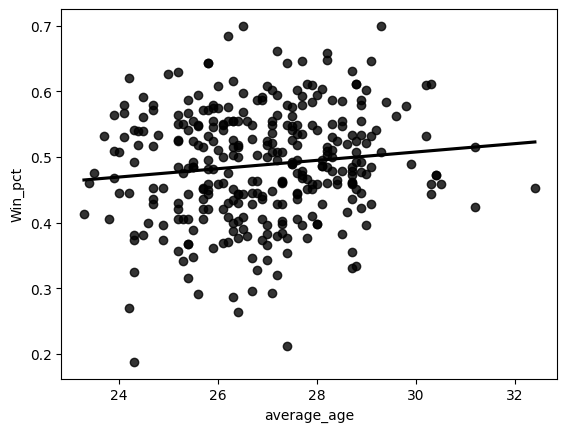

In [422]:
fgi1 = sn.regplot(data=df, x = 'average_age', y = 'Win_pct', color= 'black', ci = 5)

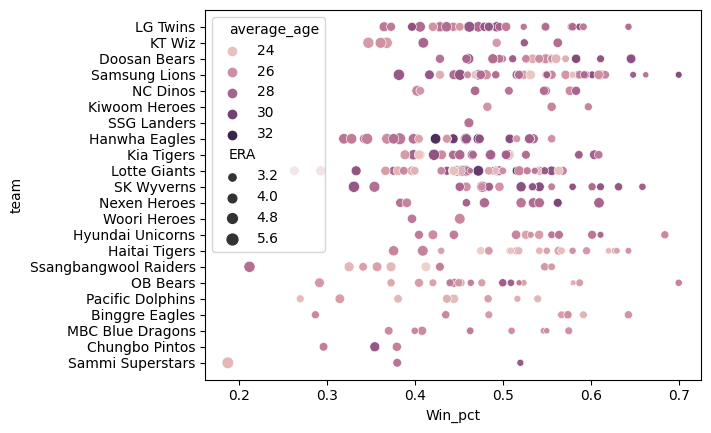

In [423]:
fig2 = sn.scatterplot(data = df, x = "Win_pct", y = "team", hue = "average_age", size = "ERA")

In [424]:
len(df.team.unique())

22

In [425]:
df.isna().sum()/len(df.year)

id                     0.000000
year                   0.000000
team                   0.000000
average_age            0.000000
runs_per_game          0.000000
wins                   0.000000
losses                 0.000000
win_loss_percentage    0.000000
ERA                    0.000000
run_average_9          0.000000
games                  0.000000
games_started          0.430341
games_finished         0.430341
complete_game          0.000000
shutouts               0.000000
saves                  0.000000
innings_pitched        0.000000
hits                   0.000000
runs                   0.000000
earned_runs            0.000000
home_runs              0.000000
walks                  0.000000
intentional_walks      0.430341
strikeouts             0.000000
hit_batter             0.000000
balks                  0.430341
wild_pitches           0.430341
batters_faced          0.000000
WHIP                   0.000000
hits_9                 0.000000
homeruns_9             0.000000
walks_9 

In [426]:
class Preprocessing():
    def __init__(self):
        pass
    def Encode(self, data):
        ordinal_encoder = OrdinalEncoder()
        cl = ["team"]
        cl_cat = data[cl]
        cl_encoded = ordinal_encoder.fit_transform(cl_cat)
        data[cl] = cl_encoded
        return data
    
    def Drop(self,data):
        data.drop(columns = ["wins","losses", "win_loss_percentage", 'id'], inplace = True)
        return data
    
    def Impute(self, data):
        imputer = KNNImputer(n_neighbors= 10)
        data[data.columns[data.isna().any()].tolist()] = imputer.fit_transform(data[data.columns[data.isna().any()].tolist()])
        return data
    
    def fit_transform(self,data):
        self.Drop(data)
        self.Encode(data)
        return self.Impute(data)

In [427]:
preprocessor = Preprocessing()
df = preprocessor.fit_transform(df)

In [428]:
clf = IsolationForest(max_samples = 100, random_state=42)
clf.fit(df)

IsolationForest(max_samples=100, random_state=42)

In [429]:
ano = clf.predict(df)
ano = pd.DataFrame(ano, columns = ['Anomalies'])
ano.value_counts()

Anomalies
 1           266
-1            57
Name: count, dtype: int64

In [430]:
df = df.iloc[ano[ano['Anomalies'] == 1].index.values]

In [431]:
df.describe()

,year,team,average_age,runs_per_game,ERA,run_average_9,games,games_started,games_finished,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,intentional_walks,strikeouts,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk,Win_pct
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.00000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,2003.045113,9.890977,26.798120,4.586128,4.185263,4.653609,129.097744,134.806309,131.898496,10.180451,6.31203,29.706767,1145.446992,1151.334586,594.740602,535.526316,105.992481,452.165414,17.891958,767.488722,66.939850,3.748284,56.196143,4965.477444,1.396865,9.025940,0.828947,3.545865,5.967293,1.705902,0.489015
std,10.408171,5.774975,1.590335,0.584003,0.604401,0.611765,9.975339,5.192574,5.879934,11.009659,3.33823,8.635409,88.368196,143.219599,104.810829,102.035072,31.702984,71.728332,7.008062,183.041685,18.959245,1.583187,11.301719,451.731371,0.095757,0.647698,0.216378,0.457394,1.100267,0.365007,0.077965
min,1983.000000,0.000000,23.300000,3.210000,2.890000,3.230000,100.000000,126.000000,115.000000,0.000000,0.00000,7.000000,880.200000,803.000000,374.000000,310.000000,39.000000,260.000000,0.000000,329.000000,30.000000,0.000000,22.000000,3707.000000,1.163000,7.500000,0.300000,2.600000,3.200000,0.850000,0.263158
25%,1994.250000,5.000000,25.700000,4.130000,3.712500,4.180000,126.000000,133.000000,129.000000,2.000000,4.00000,25.000000,1111.925000,1050.750000,518.000000,459.250000,81.250000,404.000000,16.000000,653.000000,53.000000,3.000000,51.250000,4737.750000,1.323750,8.600000,0.700000,3.300000,5.200000,1.480000,0.436508
50%,2003.000000,10.000000,26.800000,4.620000,4.220000,4.660000,128.000000,135.423913,132.625000,5.000000,6.00000,30.000000,1135.700000,1139.000000,586.000000,530.500000,102.000000,451.500000,17.788043,790.000000,66.000000,3.902174,56.983696,4961.000000,1.401500,9.000000,0.800000,3.500000,6.100000,1.720000,0.492560
75%,2012.000000,14.000000,27.900000,5.017500,4.610000,5.077500,133.000000,135.423913,132.625000,18.750000,9.00000,36.000000,1187.775000,1247.250000,669.750000,607.750000,128.000000,505.750000,18.000000,893.000000,79.000000,4.000000,56.983696,5204.750000,1.468750,9.500000,1.000000,3.900000,6.700000,1.947500,0.548611
max,2021.000000,21.000000,32.400000,5.860000,5.490000,5.990000,144.000000,144.000000,144.000000,51.000000,16.00000,52.000000,1296.200000,1518.000000,820.000000,747.000000,189.000000,647.000000,44.000000,1149.000000,120.000000,11.000000,103.000000,5782.000000,1.618000,10.600000,1.400000,5.100000,8.200000,2.740000,0.684211


In [432]:
corr_matrix = df.corr()

In [433]:
corr_matrix['Win_pct'].sort_values(ascending=False)

Win_pct              1.000000
saves                0.532913
strikeout_walk       0.397150
strikeouts_9         0.269537
strikeouts           0.260339
shutouts             0.237912
innings_pitched      0.184241
average_age          0.135907
year                 0.128131
games                0.127301
batters_faced        0.065690
games_finished       0.054855
games_started        0.047635
balks               -0.028439
home_runs           -0.030762
hits                -0.051554
team                -0.064471
hit_batter          -0.073710
homeruns_9          -0.084386
wild_pitches        -0.092357
complete_game       -0.098078
walks               -0.145563
intentional_walks   -0.162759
earned_runs         -0.197054
runs                -0.224510
walks_9             -0.283439
hits_9              -0.297988
ERA                 -0.364282
WHIP                -0.373381
runs_per_game       -0.393835
run_average_9       -0.415579
Name: Win_pct, dtype: float64

In [434]:
px.imshow(corr_matrix)

In [435]:
train, test = train_test_split(df, test_size= .25, random_state=42)

In [436]:
X_train = train.drop(columns = 'Win_pct')
y_train = train['Win_pct']

In [437]:
X_test = test.drop(columns = 'Win_pct')
y_test= test['Win_pct'].copy()

### Model Building

In [438]:
Lr = LinearRegression()
CB = CatBoostRegressor(verbose=False)
GB = GradientBoostingRegressor()
BR = BayesianRidge()
EN = ElasticNet()
KR = KernelRidge()
Rf = RandomForestRegressor()

In [439]:
Rf.fit(X_train, y_train)
KR.fit(X_train, y_train)
EN.fit(X_train, y_train)
BR.fit(X_train, y_train)
GB.fit(X_train, y_train)
CB.fit(X_train, y_train)
Lr.fit(X_train, y_train)

LinearRegression()

In [440]:
Rf_scores = -np.mean(cross_val_score(Rf, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error'))
KR_scores = -np.mean(cross_val_score(KR, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error'))
EN_scores = -np.mean(cross_val_score(EN, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error'))
BR_scores = -np.mean(cross_val_score(BR, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error'))
GB_scores = -np.mean(cross_val_score(GB, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error'))
CB_scores = -np.mean(cross_val_score(CB, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error'))
Lr_scores = -np.mean(cross_val_score(Lr, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error'))

In [441]:
scores = {'RandomForest': Rf_scores, 'Kernel Ridge' : KR_scores, 'Elastic Net' : EN_scores, 'Bayesian Ridge' : BR_scores, 'Gradient Boosting' : GB_scores,
         'Cat Boost' : CB_scores, 'Linear Regression' : Lr_scores}

In [442]:
dscores = pd.DataFrame(data = scores, index=[0])

In [443]:
dscores

,RandomForest,Kernel Ridge,Elastic Net,Bayesian Ridge,Gradient Boosting,Cat Boost,Linear Regression
0,0.056388,0.052328,0.06453,0.053217,0.055592,0.052634,0.054859


<Axes: >

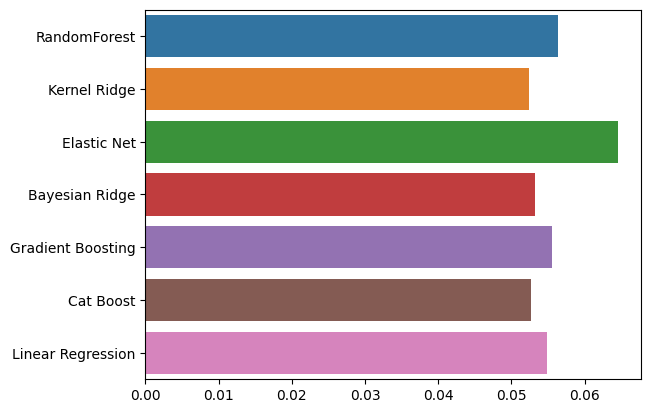

In [444]:
sn.barplot(data = dscores, orient= 'h')

In [445]:
CB.fit(X_train, y_train)

In [446]:
feat_imp = CB.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,saves,26.823745
1,strikeout_walk,7.338355
2,run_average_9,5.181374
3,team,5.119995
4,innings_pitched,4.522142
5,ERA,3.742268
6,WHIP,3.577959
7,shutouts,3.126268
8,average_age,3.080942
9,home_runs,3.034420


In [447]:
best_feat = list(feat_imp['Feature Id'])[:20]

In [448]:
X_train = X_train[best_feat]

In [449]:
CB.fit(X_train, y_train)

In [450]:
scores = -cross_val_score(CB, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error')

In [451]:
scores

array([0.04485224, 0.04667102, 0.04707614, 0.06179576, 0.05684196])

In [452]:
param_grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

In [453]:
grid_search = GridSearchCV(CB, param_grid=param_grid, cv = 5)

In [454]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000280247A3F90>,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [455]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [456]:
bestCB = grid_search.best_estimator_

In [457]:
bestCB.fit(X_train, y_train)

In [458]:
scores = -cross_val_score(bestCB, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error')

In [459]:
np.mean(scores)

0.04923351149196649

In [460]:
final_pred = bestCB.predict(X_test)

In [461]:
lin_mse = mean_squared_error(y_test, final_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.06264873846685526

In [462]:
comparison = {'Predicted Win %' : final_pred, 'Actual Win %': y_test}

In [463]:
results = pd.DataFrame(comparison)

In [464]:
results

,Predicted Win %,Actual Win %
213,0.506703,0.404762
149,0.455163,0.420635
169,0.523746,0.496241
250,0.410587,0.563492
68,0.422828,0.458333
302,0.485959,0.536364
176,0.500184,0.541353
145,0.541951,0.555556
126,0.450294,0.396825
114,0.500962,0.533835
